En este ejemplo aplicamos regularizacion al conjunto de datos de prediccion de precios de Automoviles.
Existen dos formas de Regularizar.
    1) Ridge Regression
    2) Lasso Regression.
    
Primero aplicamos un modelo de regresion linear comun, y luego probamos co estos dos para ver si nuestro modeo original es bueno o no usando los indicadores mas utilizados.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
import sklearn.model_selection as ms
import sklearn.metrics as sklm
import math
import scipy.stats as ss
import numpy.random as nr
from sklearn import linear_model

In [4]:
Features = np.array(pd.read_csv('Auto_data_Features.csv'))
Labels = np.array(pd.read_csv('Auto_Data_Labels.csv'))

In [5]:
print(Features.shape)
print(Labels.shape)

(195, 45)
(195, 1)


In [6]:
Features[:1,:]

array([[-1.68343913, -0.43850391, -0.83974908, -2.11724542, -0.02101769,
         0.2045987 ,  0.51855504, -1.82027761, -0.29493307, -0.68510498,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  0.        ]])

In [7]:
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx,test_size = 40)

x_train = Features[indx[0],:]
y_train = np.ravel(Labels[indx[0]])
x_test = Features[indx[1],:]
y_test = np.ravel(Labels[indx[1]])

Creamos un modelo de regresion lineal simple con metricas e indicadores.

In [8]:
lin_mod = linear_model.LinearRegression()
lin_mod.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Creamos una funcion que nos muestre las principales indicadores.

In [9]:
def crea_metricas(y_true, y_predicted):
    r2 = sklm.r2_score(y_true,y_predicted)
    print('El error  cuadratico es: ' + str(sklm.mean_squared_error(y_true,y_predicted)))
    print('El error medio cuadratico: ' + str(math.sqrt(sklm.mean_squared_error(y_true,y_predicted))))
    print('El error abusoluto es: ' + str(sklm.mean_absolute_error(y_true,y_predicted)))
    print('El error medio absoluto es: ' + str(sklm.median_absolute_error(y_true,y_predicted)) )
    print('R^2: ' + str(r2))

def dibuja_residuos(y_true,y_predicted):
    residuos = np.subtract(y_true.reshape(-1,1),y_predicted.reshape(-1,1))
    sea.regplot(y_predicted,residuos, fit_reg = False)
    plt.title('Residuos vs valores predichos')
    plt.xlabel('Valores predecidos')
    plt.ylabel('Residuos')
    plt.show()

def hist_residuos(y_true,y_predicted):
    residuales = np.subtract(y_true.reshape(-1,1),y_predicted.reshape(-1,1))
    sea.distplot(residuales)
    plt.title('histogama de residuos')
    plt.ylabel('Cantidad')
    plt.xlabel('Residuos')
    plt.show()
    
def qq_plot(y_test,y_predicted):
    residuos = np.subtract(y_test.reshape(-1,1),y_predicted.reshape(-1,1))
    ss.probplot(residuos.flatten() , plot = plt)
    plt.title('Residuos vs. valor predicho')
    plt.ylabel('Valor predicho')
    plt.xlabel('Residuos')
    plt.show()
    

El error  cuadratico es: 0.02103483180293403
El error medio cuadratico: 0.14503389880622403
El error abusoluto es: 0.11896679673181162
El error medio absoluto es: 0.09769580826159974
R^2: 0.9271178345990491


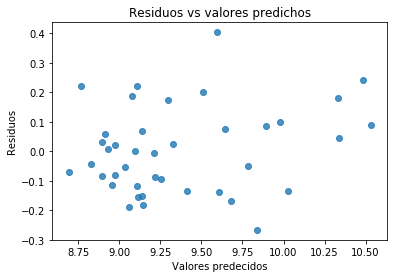

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


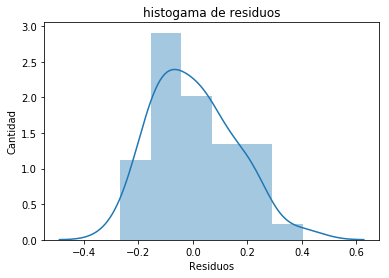

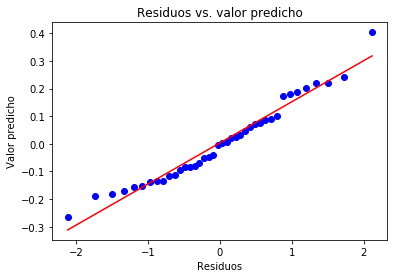

In [10]:
prediccion = lin_mod.predict(x_test)
crea_metricas(y_test,prediccion)
dibuja_residuos(y_test,prediccion)
hist_residuos(y_test,prediccion)
qq_plot(y_test, prediccion)

Estos valores no son tan malos pero necesitamos aplicar regularizacion para mejorarlos.

In [11]:
def plot_regularizacion(l, train_RSME,  test_RSME, coef_,min_idx):
    plt.plot(l,test_RSME,color = 'red', label = 'test')
    plt.plot(l, train_RSME, color = 'blue', label = 'train')
    plt.axvline(min_idx,color='green',linestyle='--')
    plt.legend()
    plt.xlabel('r_param')
    plt.ylabel('RMSE')
    plt.show()
    
    plt.plot(l,coef_)
    plt.axvline(min_idx,color = 'red',linestyle='--')
    plt.xlabel('Reg param')
    plt.ylabel('model coef_')
    plt.show()

def regularizacion(x_train, y_train, x_test, y_test, l2):
    test_RMSE = []
    coef = []
    train_RMSE = []
    coef_ = []
    for reg in l2:
        lin_mod = linear_model.Ridge(alpha=reg)
        lin_mod.fit(x_train,y_train)
        coef_.append(lin_mod.coef_)
        y_scored_train = lin_mod.predict(x_train)
        train_RMSE.append(sklm.mean_squared_error(y_train, y_scored_train))
        y_scored_test = lin_mod.predict(x_test)
        test_RMSE.append(sklm.mean_squared_error(y_test,y_scored_test))
        
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RSE = test_RMSE[min_idx]
    plot_regularizacion(l2,train_RMSE,test_RMSE,coef_,min_l2)
    return min_l2, min_RSE


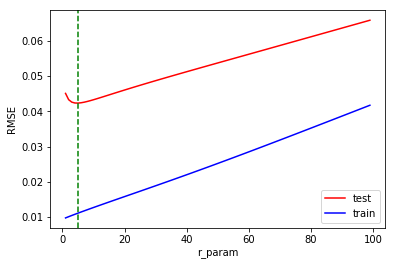

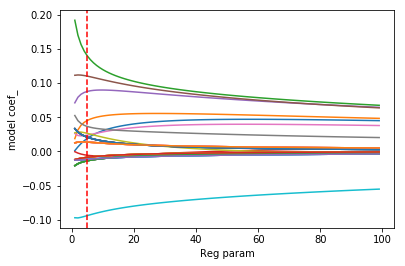

5


In [12]:
L2 = [x for x in range(1,100)]
reg_param = regularizacion(x_test,y_test,x_train,y_train,L2)
print(reg_param[0])

Sabemos cual es el valor de reg_param[0] que hace minimo al modelo. lo aplicamos.

Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
El error  cuadratico es: 0.020503386809725355
El error medio cuadratico: 0.14319003739689906
El error abusoluto es: 0.11780917311890118
El error medio absoluto es: 0.10766324799331173
R^2: 0.9289592023960161


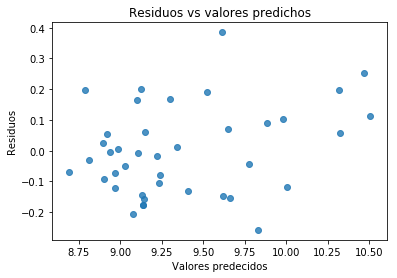

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


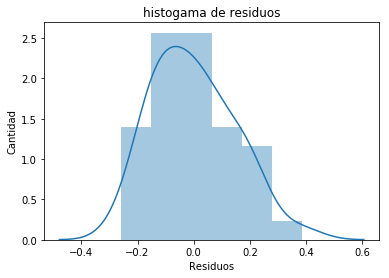

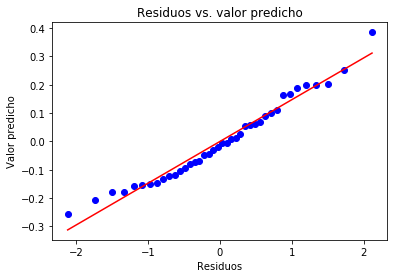

In [13]:
lin_mod = linear_model.Ridge(alpha=reg_param[0])
print(lin_mod)
lin_mod.fit(x_train,y_train)
y_score = lin_mod.predict(x_test)
crea_metricas(y_test,y_score)
dibuja_residuos(y_test,y_score)
hist_residuos(y_test,y_score)
qq_plot(y_test, y_score)

In [18]:
def ridgeregresion(x_train,y_train,x_test,y_test,l2):
    coef_ = []
    test_RMSE = []
    train_RMSE = []
    for reg in l2:
        lin_mod = linear_model.Lasso(alpha = reg)
        lin_mod.fit(x_train,y_train)
        coef_.append(lin_mod.coef_)
        y_train_final = lin_mod.predict(x_train)
        test_RMSE.append(sklm.mean_squared_error(y_train,y_train_final))
        y_test_final = lin_mod.predict(x_test)
        train_RMSE.append(sklm.mean_squared_error(y_test,y_test_final))
    
    min_idx = np.argmin(test_RMSE)
    min_l2 = l2[min_idx]
    min_RSE = test_RMSE[min_idx]
    plot_regularizacion(l2,train_RMSE,test_RMSE,coef_,min_l2)
    return min_l2, min_RSE
    

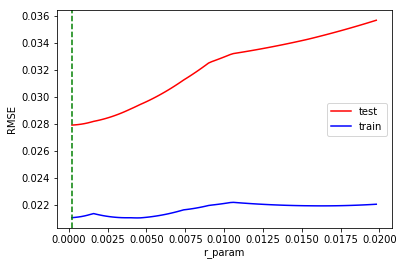

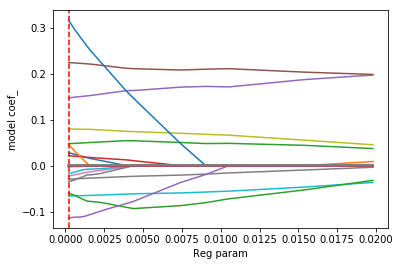

In [24]:
ls = [x/5000 for x in range(1,100)]
min_l2 = ridgeregresion(x_train,y_train,x_test,y_test,ls)

In [26]:
lin_mod = linear_model.Lasso(alpha = min_l2[0])
lin_mod.fit(x_train,y_train)
y_predict = lin_mod.predict(x_test)

El error  cuadratico es: 0.021032992870634905
El error medio cuadratico: 0.14502755900391795
El error abusoluto es: 0.11911109086126315
El error medio absoluto es: 0.0981185105727933
R^2: 0.9271242061911418


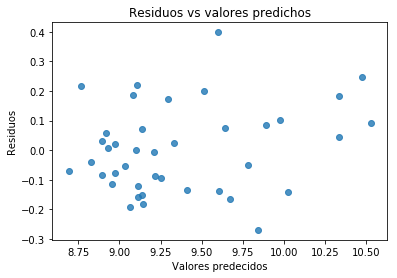

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


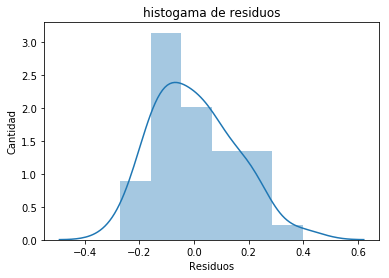

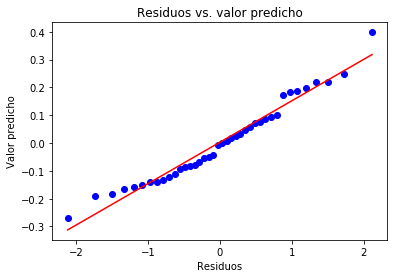

In [27]:
crea_metricas(y_test,y_predict)
dibuja_residuos(y_test,y_predict)
hist_residuos(y_test,y_predict)
qq_plot(y_test, y_predict)